In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Get data

In [22]:
df = pd.read_excel('20250808_yoyo_intermittent_recovery_level_1.xlsx')
df.head(5)

,naam,speed_level,shuttle,speed,distance
0,Biswese Pumbulu Erik-Jan,18,1,16.5,1760
1,Bolou Benedition,14,2,14.5,520
2,Bruyninckx Ylano,0,0,0.0,0
3,De Byser Noah,0,0,0.0,0
4,De Cock Luis,0,0,0.0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   naam         36 non-null     object 
 1   speed_level  36 non-null     int64  
 2   shuttle      36 non-null     int64  
 3   speed        36 non-null     float64
 4   distance     36 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ KB


# Transform data

In [24]:
# Calculate VO2max
df['vo2max'] = df['distance'] * 0.0084 + 36.4
df.head(5)

,naam,speed_level,shuttle,speed,distance,vo2max
0,Biswese Pumbulu Erik-Jan,18,1,16.5,1760,51.184
1,Bolou Benedition,14,2,14.5,520,40.768
2,Bruyninckx Ylano,0,0,0.0,0,36.400
3,De Byser Noah,0,0,0.0,0,36.400
4,De Cock Luis,0,0,0.0,0,36.400


In [25]:
# Set rating
def set_rating(distance):
    if distance > 2400:
        return "Elite"
    elif distance > 2000:
        return "Excellent"
    elif distance > 1520:
        return "Good"
    elif distance > 1040:
        return "Average"
    elif distance > 520:
        return "Below Average"
    else:
        return "Poor"

df['rating'] = df['distance'].apply(set_rating)
df.head(5)

,naam,speed_level,shuttle,speed,distance,vo2max,rating
0,Biswese Pumbulu Erik-Jan,18,1,16.5,1760,51.184,Good
1,Bolou Benedition,14,2,14.5,520,40.768,Poor
2,Bruyninckx Ylano,0,0,0.0,0,36.400,Poor
3,De Byser Noah,0,0,0.0,0,36.400,Poor
4,De Cock Luis,0,0,0.0,0,36.400,Poor


# Visualise data

In [26]:
# Colors
background_color = "#f2f4ee"
dark_color = "#053225"
red_color = "#C73E1D"

# Text styles
font = 'Futura'
h1_size = 18
h2_size = 16
h3_size = 14
p_size = 12
label_size = 8

def setup_plot(figsize=(12, 9), title_height_ratio=0.1, legend_height_ratio=0.1):
    """
    Set up the basic plot structure with heading_ax, main_ax, and legend_ax
    
    Returns:
    fig, heading_ax, main_ax, legend_ax
    """
    
    # Apply styling
    plt.rcParams['font.family'] = font
    plt.rcParams.update({
        'text.color': dark_color,
        'axes.labelcolor': dark_color,
        'axes.edgecolor': dark_color,
        'xtick.color': dark_color,
        'ytick.color': dark_color,
        'grid.color': dark_color,
    })

    # Create figure
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(3, 1, height_ratios=[title_height_ratio, 1-title_height_ratio-legend_height_ratio, legend_height_ratio])
    
    # Set background
    fig.set_facecolor(background_color)
    
    # Title axis
    heading_ax = fig.add_subplot(gs[0])
    heading_ax.axis('off')
    
    # Main plot axis
    main_ax = fig.add_subplot(gs[1])
    main_ax.set_facecolor(background_color)
    
    
    # Remove spines
    main_ax.spines['top'].set_visible(False)
    main_ax.spines['right'].set_visible(False)
    
    # Create legend axis (positioned below main plot)
    legend_ax = fig.add_subplot(gs[2])
    legend_ax.axis('off')
    
    return fig, heading_ax, main_ax, legend_ax

def save_plot(fig, filename, **kwargs):
    """Save plot with consistent settings"""

    default_kwargs = {
        'bbox_inches': 'tight',
        'pad_inches': 0.5,
        'facecolor': background_color,
        'dpi': 300
    }
    default_kwargs.update(kwargs)
    
    plt.savefig(filename, **default_kwargs)

In [27]:
# Sort players by their performance in the test
df = df.sort_values(by='distance', ascending=True).reset_index(drop=True)

# Filter out players who were absent
df = df[df['distance'] > 0]

df.head(5)

,naam,speed_level,shuttle,speed,distance,vo2max,rating
10,Bolou Benedition,14,2,14.5,520,40.768,Poor
11,Katania Griseld,15,8,15.0,1080,45.472,Average
12,Malundama Joshua,16,2,15.5,1160,46.144,Average
13,Kimputu Efekele Nathan,17,4,16.0,1560,49.504,Good
14,Kalubi Mutuwambuji Noah Jean-Pierre,18,1,16.5,1760,51.184,Good


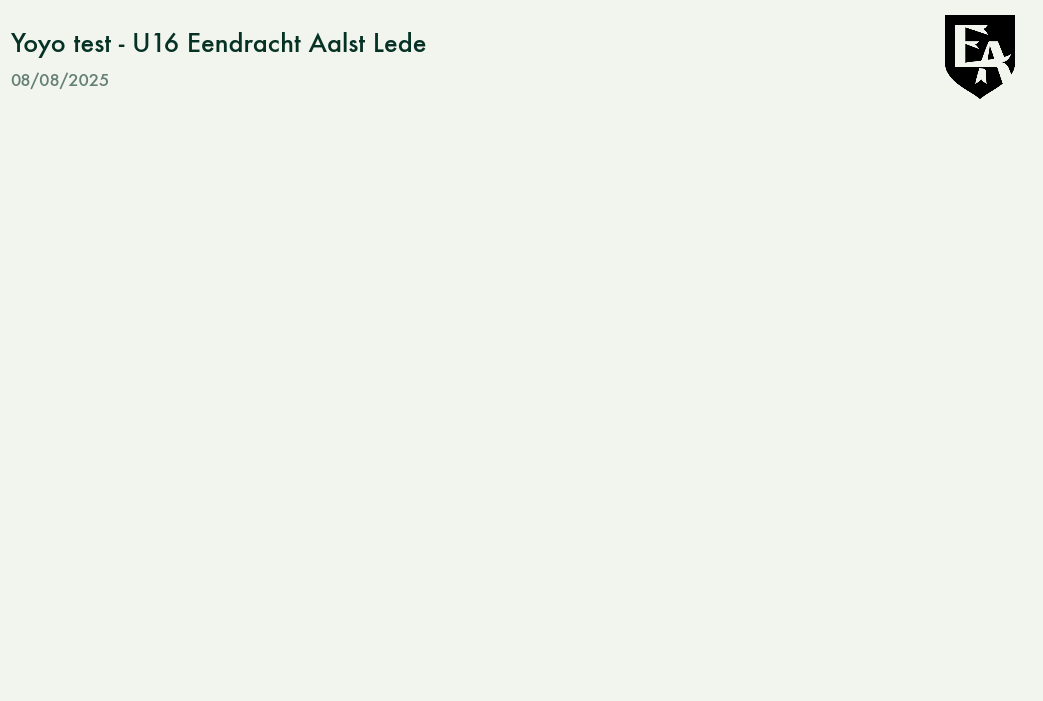

In [29]:
# Set up plot
fig, heading_ax, main_ax, legend_ax = setup_plot(legend_height_ratio=0)
alpha = 0.6

# Remove legend (not needed)
legend_ax.remove()


# HEADING

# Add title
heading_ax.text(-0.1, 0.9, 'Yoyo test - U16 Eendracht Aalst Lede', fontsize=h1_size, ha='left', va='center')
heading_ax.text(-0.1, 0.3, '08/08/2025', fontsize=p_size, ha='left', va='center', alpha=alpha)


# Add Euros 2024 logo
logo = mpimg.imread('./assets/eal-logo.png')
imagebox = OffsetImage(logo, zoom=0.2)
ab = AnnotationBbox(imagebox, (0.98, 0.7), xycoords='axes fraction', box_alignment=(1, 0.5), frameon=False)
heading_ax.add_artist(ab)


# MAIN

# Remove labels and ticks
main_ax.set_yticklabels([])
main_ax.set_yticks([])
main_ax.set_xticks([])

# Remove all spines
main_ax.spines['top'].set_visible(False)
main_ax.spines['right'].set_visible(False)
main_ax.spines['left'].set_visible(False)
main_ax.spines['bottom'].set_visible(False)

# # Loop through data and plot dribbles
# for i, row in df_top_dribblers_per_90.iterrows():
#     # Check if player is Jeremy Doku and set opacity accordingly
#     player = row['player_name']
#     alpha = 1.0 if player == 'Jeremy Doku' else 0.4

#     # Plot complete/incomplete dribbles
#     main_ax.barh(
#         player,
#         row['successful_dribbles_per_90'],
#         color=dark_color,
#         alpha=alpha
#     )
#     main_ax.barh(
#         player,
#         row['unsuccessful_dribbles_per_90'],
#         color=red_color,
#         left=row['successful_dribbles_per_90'],
#         alpha=alpha
#     )

#     # Plot total number of dribbles
#     total = row['dribbles_per_90']
#     main_ax.text(total + 0.25, i, str(total), va='center', fontweight='bold', fontsize=label_size, alpha=alpha)

#     # Plot custom player labels
#     main_ax.text(-0.2, i - 0.02,
#             f"{row['player_name']}", 
#             ha='right',
#             va='bottom',
#             fontsize=label_size,
#             fontweight='bold',
#             alpha=alpha)
#     main_ax.text(-0.2, i - 0.1,
#             f"{row['team_name']}", 
#             ha='right',
#             va='top',
#             fontsize=6,
#             color=dark_color,
#             alpha=alpha)
            
# # Add annotations for complete and incomplete dribbles
# for i, v in enumerate(df_top_dribblers_per_90['successful_dribbles_per_90']):
#     # Check if player is Doku
#     player = df_top_dribblers_per_90.iloc[i]['player_name']
#     alpha = 0.8 if player == 'Jeremy Doku' else 0.4
#     main_ax.text(v/2, i, str(v), 
#             color='white',
#             alpha=alpha,
#             va='center',
#             ha='center',
#             fontsize= label_size,
#             fontweight='bold')
# for i, v in enumerate(df_top_dribblers_per_90['unsuccessful_dribbles_per_90']):
#     # Check if player is Doku
#     player = df_top_dribblers_per_90.iloc[i]['player_name']
#     alpha = 0.8 if player == 'Jeremy Doku' else 0.4
#     main_ax.text(v/2 + df_top_dribblers_per_90['successful_dribbles_per_90'].iloc[i], i, str(v), 
#             color='white',
#             alpha=alpha,
#             va='center',
#             ha='center',
#             fontsize= label_size,
#             fontweight='bold')

# Save and show plot
#save_plot(fig, 'dribbles_per_90_top_15.png')
plt.show()